In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim


In [2]:
# Import our input dataset
ny_df = pd.read_csv('column_listings_df.csv')
ny_df.head()

,listing_id,listing_url,name,host_id,host_url,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,52702018,https://www.airbnb.com/rooms/52702018,Rental unit in Queens · ★4.90 · 1 bedroom · 2 ...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-21,4.90,4.95,4.90,4.95,4.94,4.85,4.87,3,8.53
1,784969376930125242,https://www.airbnb.com/rooms/784969376930125242,Home in Queens · ★4.97 · 3 bedrooms · 4 beds ·...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-15,4.97,4.97,4.97,4.95,4.95,4.84,4.87,3,4.47
2,9919728,https://www.airbnb.com/rooms/9919728,Townhouse in Queens · ★4.33 · 3 bedrooms · 7 b...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-02-18,4.33,4.17,4.33,4.83,4.67,4.83,4.33,7,0.09
3,53696990,https://www.airbnb.com/rooms/53696990,Vacation home in Queens · Studio · 2 beds · 1 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2022-09-16,4.00,4.00,3.00,5.00,4.00,5.00,3.00,7,0.08
4,9920363,https://www.airbnb.com/rooms/9920363,Townhouse in Queens · ★4.25 · 5 bedrooms · 11 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-01-01,4.25,4.25,3.75,4.75,4.00,4.75,4.50,7,0.09


In [74]:
# import random

# # Path to the CSV file
# random.seed(42)

# # Path to the CSV file
# csv_file_path = 'column_listings_df.csv'

# # Read the CSV file with a random sample using the fixed random seed
# ny_df = pd.read_csv(csv_file_path, skiprows=lambda i: i > 0 and random.random() > 7000 / total_rows)

# # Display the first few rows of the sampled DataFrame
# ny_df.head()

,listing_id,listing_url,name,host_id,host_url,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,784969376930125242,https://www.airbnb.com/rooms/784969376930125242,Home in Queens · ★4.97 · 3 bedrooms · 4 beds ·...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3,3,...,2023-08-15,4.97,4.97,4.97,4.95,4.95,4.84,4.87,3,4.47
1,53696990,https://www.airbnb.com/rooms/53696990,Vacation home in Queens · Studio · 2 beds · 1 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10,10,...,2022-09-16,4.00,4.00,3.00,5.00,4.00,5.00,3.00,7,0.08
2,40322951,https://www.airbnb.com/rooms/40322951,Home in Brooklyn · ★4.67 · 1 bedroom · 1 bed ·...,297311545,https://www.airbnb.com/users/show/297311545,Uchenna,2019-09-23,f,3,4,...,2022-05-06,4.67,4.67,4.33,4.67,4.67,4.50,4.33,3,0.13
3,39898950,https://www.airbnb.com/rooms/39898950,Home in Brooklyn · ★3.63 · 1 bedroom · 1 bed ·...,297311545,https://www.airbnb.com/users/show/297311545,Uchenna,2019-09-23,f,3,4,...,2021-10-26,3.63,4.00,3.25,4.38,4.25,4.13,3.63,3,0.18
4,31717837,https://www.airbnb.com/rooms/31717837,Home in Brooklyn · ★5.0 · 2 bedrooms · 3 beds ...,234174616,https://www.airbnb.com/users/show/234174616,Onika,2019-01-03,f,1,1,...,2022-09-01,5.00,5.00,5.00,5.00,5.00,4.86,5.00,1,0.15


In [224]:
ny_df.columns

Index(['listing_id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [3]:
ny_df=ny_df[['room_type', 'accommodates', 'bedrooms','neighbourhood_cleansed','price', 'review_scores_rating']]
ny_df = ny_df[ny_df['review_scores_rating'] >= 3]

ny_df['bedrooms']= ny_df['bedrooms'].fillna(1)
ny_df['price']= ny_df['price'].str.extract('(\d+\.\d+|\d+)').astype(float)

ny_df.head(3)

,room_type,accommodates,bedrooms,neighbourhood_cleansed,price,review_scores_rating
0,Entire home/apt,4,1.0,East Elmhurst,171.0,4.90
1,Entire home/apt,7,3.0,East Elmhurst,311.0,4.97
2,Entire home/apt,12,3.0,Middle Village,328.0,4.33


In [4]:
# Specify the columns you want to check for outliers (numerical columns)
numerical_columns = ['bedrooms', 'price', 'accommodates']

# Loop through each numerical column and identify outliers
for column in numerical_columns:
    Q1 = ny_df[column].quantile(0.25)
    Q3 = ny_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify and print the outliers
    outliers = ny_df[(ny_df[column] < lower_bound) | (ny_df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in bedrooms:
             room_type  accommodates  bedrooms neighbourhood_cleansed  price  \
1      Entire home/apt             7       3.0          East Elmhurst  311.0   
2      Entire home/apt            12       3.0         Middle Village  328.0   
4      Entire home/apt            16       5.0              Ridgewood  485.0   
5      Entire home/apt             6       2.0              Ridgewood  242.0   
6      Entire home/apt             6       2.0              Ridgewood  245.0   
...                ...           ...       ...                    ...    ...   
27661  Entire home/apt             4       2.0           Williamsburg  120.0   
27663  Entire home/apt             2       2.0                 Nolita  375.0   
27678  Entire home/apt             7       3.0                Astoria  220.0   
27684  Entire home/apt             6       2.0            South Slope  200.0   
27704  Entire home/apt             4       2.0        Upper West Side  250.0   

       review_sco

In [5]:
def remove_outliers(ny_df, column):
    Q1 = ny_df[column].quantile(0.25)
    Q3 = ny_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a new DataFrame without outliers in the specified column
    df_cleaned = ny_df[(ny_df[column] >= lower_bound) & (ny_df[column] <= upper_bound)]
    return df_cleaned

# Loop through each numerical column and remove outliers
for column in numerical_columns:
    ny_df = remove_outliers(ny_df, column)

In [6]:
num_rows = len(ny_df)
print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 11309


In [7]:
# Encode data
encode_df = pd.get_dummies(ny_df, columns=['room_type', 'neighbourhood_cleansed'], prefix=['room_type', 'neighbourhood_cleansed'])
encode_df.head(3)

,accommodates,bedrooms,price,review_scores_rating,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,...,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside
14,2,1.0,68.0,4.73,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,2,1.0,163.0,4.91,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,2,1.0,166.0,4.88,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
encode_df.dtypes

accommodates                                int64
bedrooms                                  float64
price                                     float64
review_scores_rating                      float64
room_type_Entire home/apt                   uint8
                                           ...   
neighbourhood_cleansed_Whitestone           uint8
neighbourhood_cleansed_Williamsburg         uint8
neighbourhood_cleansed_Windsor Terrace      uint8
neighbourhood_cleansed_Woodhaven            uint8
neighbourhood_cleansed_Woodside             uint8
Length: 136, dtype: object

In [8]:
encode_df = encode_df.dropna()

In [18]:
# from sklearn.preprocessing import StandardScaler

y = encode_df['price']
X = encode_df.drop(['price'], axis=1)

# scaler = StandardScaler()

# X_standardized = scaler.fit_transform(X)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
train_data = X_train.join(y_train)

In [21]:
train_data

,accommodates,bedrooms,review_scores_rating,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
15079,2,1.0,4.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53.0
9570,2,1.0,4.41,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55.0
88,2,1.0,4.60,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
9555,2,1.0,4.61,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,320.0
25183,2,1.0,5.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24094,2,1.0,4.91,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,256.0
11717,2,1.0,4.94,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135.0
11683,2,1.0,4.57,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,163.0
5831,2,1.0,5.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,299.0


array([[<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'room_type_Entire home/apt'}>,
        <Axes: title={'center': 'room_type_Hotel room'}>,
        <Axes: title={'center': 'room_type_Private room'}>,
        <Axes: title={'center': 'room_type_Shared room'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Arverne'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Astoria'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Bath Beach'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Battery Park City'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Bay Ridge'}>],
       [<Axes: title={'center': 'neighbourhood_cleansed_Bayside'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Bayswater'}>,
        <Axes: title={'center': 'neighbourhood_cleansed_Bedford-Stuyvesant'}>,
        <Axes: title={'center': '

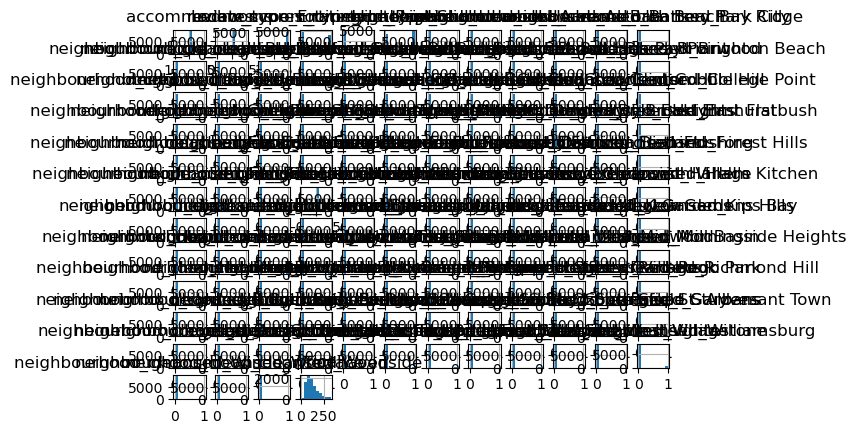

In [22]:
train_data.hist()

LogisticRegression

In [293]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [294]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [295]:
y_pred = regr.predict(X_test)

In [296]:
# Assuming you already have predictions for the test dataset
y_pred = regr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 81280572505841.84


In [297]:
# Score the model
print(f"Training Data Score: {regr.score(X_train, y_train)}")
print(f"Testing Data Score: {regr.score(X_test, y_test)}")

Training Data Score: 0.3752701484770603
Testing Data Score: -1.6231924830812604e+24


#Deep Learning

In [298]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=135, activation="linear", input_dim=135))
nn.add(tf.keras.layers.Dense(units=135, activation="linear"))
nn.add(tf.keras.layers.Dense(units=135, activation="linear"))
nn.add(tf.keras.layers.Dense(units=135, activation="linear"))
nn.add(tf.keras.layers.Dense(units=1))

nn.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 135)               18360     
                                                                 
 dense_162 (Dense)           (None, 135)               18360     
                                                                 
 dense_163 (Dense)           (None, 135)               18360     
                                                                 
 dense_164 (Dense)           (None, 135)               18360     
                                                                 
 dense_165 (Dense)           (None, 1)                 136       
                                                                 
Total params: 73576 (287.41 KB)
Trainable params: 73576 (287.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [299]:
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [300]:
#fit_model = nn.fit(X_train,y_train,epochs=30)

fit_model = nn.fit(X_train, y_train, epochs=80, validation_split=0.2) 

Epoch 1/80
212/212 [==============================] - 1s 2ms/step - loss: 14412.2832 - mean_absolute_error: 97.5760 - val_loss: 4222.2783 - val_mean_absolute_error: 46.7845
Epoch 2/80
212/212 [==============================] - 0s 2ms/step - loss: 3450.7256 - mean_absolute_error: 41.3924 - val_loss: 2956.6094 - val_mean_absolute_error: 41.0260
Epoch 3/80
212/212 [==============================] - 0s 2ms/step - loss: 4661.9961 - mean_absolute_error: 43.8126 - val_loss: 2763.0291 - val_mean_absolute_error: 38.7034
Epoch 4/80
212/212 [==============================] - 0s 2ms/step - loss: 3004.5269 - mean_absolute_error: 39.4290 - val_loss: 2581.5884 - val_mean_absolute_error: 38.6260
Epoch 5/80
212/212 [==============================] - 0s 2ms/step - loss: 2750.4475 - mean_absolute_error: 38.9376 - val_loss: 2530.4497 - val_mean_absolute_error: 38.0659
Epoch 6/80
212/212 [==============================] - 0s 2ms/step - loss: 2695.8484 - mean_absolute_error: 38.8656 - val_loss: 2565.6270 - 

In [301]:
test_loss, test_mae = nn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

89/89 [==============================] - 0s 1ms/step - loss: 8759.4590 - mean_absolute_error: 39.6632
Test Loss: 8759.458984375, Test MAE: 39.66324234008789


In [302]:
# Calculate predictions using the deep learning model
y_pred_nn = nn.predict(X_test)

# Calculate Mean Squared Error (MSE) for the deep learning model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Calculate Root Mean Squared Error (RMSE) for the deep learning model
rmse_nn = np.sqrt(mse_nn)

# Calculate R-squared for the deep learning model
r2_nn = r2_score(y_test, y_pred_nn)

print("Deep Learning Model - Root Mean Squared Error (RMSE):", rmse_nn)
print("Deep Learning Model - R-squared:", r2_nn)

89/89 [==============================] - 0s 939us/step
Deep Learning Model - Root Mean Squared Error (RMSE): 93.5919888688215
Deep Learning Model - R-squared: -1.152156591796083
